<a href="https://colab.research.google.com/github/robertnesterodhiambo/pythonclass/blob/main/Next_POIs_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read the dataset

In [ ]:
import pandas as pd
#skiprows=1 deop the header
df = pd.read_csv('cleaned_dataset_with_cats_v2.csv', header=None ,skiprows=1)
#print the data frame

## Categorize Time slot

In [ ]:
from sklearn import preprocessing

time_info = df[3]

label_transformer = preprocessing.LabelEncoder()
label_transformer.fit(time_info)

#LabelEncoder()

print(list(label_transformer.classes_))

integer_transform = label_transformer.transform(time_info)

print(list(label_transformer.inverse_transform([2, 2, 1])))


['afternoon', 'evening_or_night', 'morning']
['morning', 'morning', 'evening_or_night']


## Categorize Location

In [ ]:
final_data = []
for location_info in df[4].fillna(0):
    if location_info != 0:
        location_info = location_info.replace("{","")
        data= location_info.replace("}", "").split(",")
        data =" ".join(data)
        final_data.append(data)
    else:
        final_data.append("None")


In [ ]:
location_transformer = preprocessing.LabelEncoder()
location_transformer.fit(final_data)

#LabelEncoder()

n_locations = list(location_transformer.classes_)
print(len(n_locations))

94


In [ ]:
df[4] = final_data

## One Hot encoding the location categories

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_locations = location_transformer.transform(final_data)

onehot_encoder = OneHotEncoder(sparse=False)
label_locations = label_locations.reshape(len(label_locations),1)
location_encoder = onehot_encoder.fit(label_locations)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Convert target location category

In [ ]:
data_iloc6 = []
for location_info in df[6].fillna(0):
    if location_info != 0:
        location_info = location_info.replace("{","")
        data= location_info.replace("}", "").split(",")
        data =" ".join(data)
        data_iloc6.append(data)
    else:
        data_iloc6.append("None")


In [ ]:
df[6] = data_iloc6

In [ ]:
target_locations = location_transformer.transform(data_iloc6)

## location type Category

In [ ]:
category_iloc5 = []
data_df = []
for location_info in df[5].fillna(0):
    if location_info != 0:
        location_info = location_info.replace("{","")
        data= location_info.replace("}", "").split(",")
        data_df.append(data)
        for i in data :
            if(i!=''):
                category_iloc5.append(i)
    else:
        data_df.append("None")
        category_iloc5.append("None")

In [ ]:
df[5] = data_df

In [ ]:
category_transformer = preprocessing.LabelEncoder()
category_transformer.fit(category_iloc5)

#LabelEncoder()

n_category = list(category_transformer.classes_)
print(len(n_category))

18


## location type categories

In [ ]:
n_category

['Arts & Entertainment',
 'Athletics & Sports',
 'Food',
 'Food & Drink Shop',
 'Gym / Fitness Center',
 'Hotel',
 'Medical Center',
 'Nightlife Spot',
 'None',
 'Office',
 'Outdoors & Recreation',
 'Performing Arts Venue',
 'Professional & Other Places',
 'Residence',
 'Shop & Service',
 'Spiritual Center',
 'Stadium',
 'Travel & Transport']

## target location category

In [ ]:
data_df7 = []
for location_info in df[7].fillna(0):
    if location_info != 0:
        location_info = location_info.replace("{","")
        if(location_info.endswith(" ")):
            location_info = location_info[:-1]
        #location_info = location_info.replace(" ","")
        data= location_info.replace("}", "").split(",")
        data_df7.append(data)
    else:
        data_df7.append("None")

In [ ]:
df[7] = data_df7

## Friend connection stratergy

In [ ]:
friend_contact = dict()
with open("fs_friendship_CA.txt" , 'r') as txt :
    data = txt.read()
    data = data.split("\n")
    print(len(data))
    for idx , i_data in enumerate(data) :
        if(idx!=0):
            user_id , friend_id = i_data.split(",")
            if ( int(user_id) in friend_contact ):
                friend_contact[int(user_id)].append(int(friend_id))
            else:
                friend_contact[int(user_id)] = [int(friend_id) ,]
    txt.close()

32513


## Final friend connections

In [ ]:
user_id = set(df[1])
final_friend_dict =dict()
for (idx , data_val ) in friend_contact.items():
    if( idx in user_id):
        for f_id in data_val :
            if(f_id in user_id):
                if ( idx in final_friend_dict ):
                    final_friend_dict[idx].append(f_id)
                else:
                    final_friend_dict[idx] = [f_id ,]

In [ ]:
final_friend_dict

{439: [2059],
 3015: [3923],
 3923: [3015],
 2004: [2561],
 2561: [2004],
 2059: [439]}

# Create input location image for each user id

In [ ]:
# input image size should be (batch_size , friend_dim+user , n_locations , time_slots)
#df_use = df.loc[df[1] == 3616]
df_use = df.copy()

In [ ]:
df_use.head()

,0,1,2,3,4,5,6,7
0,0,3616,0,morning,37.74509989054281 -122.42973690096966 San Fran...,"[Professional & Other Places, Residence, ]",37.74509989054281 -122.42973690096966 San Fran...,"[Professional & Other Places, Residence, ]"
1,1,3616,0,afternoon,37.7666027991409 -122.429673305453 San Francis...,"[Shop & Service, ]",37.7666027991409 -122.429673305453 San Francis...,"[Shop & Service, ]"
2,2,3616,0,evening_or_night,37.76507736486825 -122.39575481805574 San Fran...,"[Residence, ]",37.76507736486825 -122.39575481805574 San Fran...,"[Residence, ]"
3,3,3616,1,morning,37.74509989054281 -122.42973690096966 San Fran...,"[Professional & Other Places, Residence, ]",37.74509989054281 -122.42973690096966 San Fran...,"[Professional & Other Places, Residence, ]"
4,4,3616,1,afternoon,37.7666027991409 -122.429673305453 San Francis...,"[Shop & Service, ]",37.7666027991409 -122.429673305453 San Francis...,"[Shop & Service, ]"


## encode the categorical columns with dummy variables

In [ ]:
#transform the categorical data using above transformers
df_use[3] =  label_transformer.transform(df_use[3])

df_use[4] = location_transformer.transform(df_use[4])

df_use[6] = location_transformer.transform(df_use[6])

## after the dummy variable integration

In [ ]:
df_use.head()

,0,1,2,3,4,5,6,7
0,0,3616,0,2,66,"[Professional & Other Places, Residence, ]",66,"[Professional & Other Places, Residence, ]"
1,1,3616,0,0,68,"[Shop & Service, ]",68,"[Shop & Service, ]"
2,2,3616,0,1,67,"[Residence, ]",67,"[Residence, ]"
3,3,3616,1,2,66,"[Professional & Other Places, Residence, ]",66,"[Professional & Other Places, Residence, ]"
4,4,3616,1,0,68,"[Shop & Service, ]",68,"[Shop & Service, ]"


## one hot encode the location type categories

In [ ]:
import numpy  as np
for idx , ( i5_row , i7_row) in enumerate(zip(df_use[5] , df_use[7])):
    i5_transformed =[]
    i7_transformed = []

    category_label  = []
    one_hot5 = np.zeros(18 , dtype=int)
    one_hot7 = np.zeros(18 , dtype=int)
    if(i5_row !="None"):
        for i in i5_row :
            if(i!=''):
                j = int(category_transformer.transform([i]))
                one_hot5[j] = 1
    if(i7_row !="None"):
        for i in i7_row :
            if(i!=''):
                j = int(category_transformer.transform([i]))
                one_hot7[j] = 1

    if(i5_row =="None"):
        i = int(category_transformer.transform(["None"]))
        one_hot5[i] = 1

    if(len(i7_row)==1 ):
        for i in i7_row:
            if(i==""):
                j = int(category_transformer.transform(["None"]))
                one_hot7[j] = 1
    if(len(i5_row)==1 ):
        for i in i7_row:
            if(i==""):
                j = int(category_transformer.transform(["None"]))
                one_hot7[j] = 1



    df_use[5][idx] = one_hot5
    df_use[7][idx] = one_hot7

Streaming output truncated to the last 5000 lines.
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use[7][idx] = one_hot7
<ipython-input-23-452ecf05308b>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  j = int(category_transformer.transform([i]))
<ipython-input-23-452ecf05308b>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  j = int(category_transformer.transform([i]))
<ipython-input-23-452ecf05308b>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

## Final Dataframe

In [ ]:
df_use.head()

,0,1,2,3,4,5,6,7
0,0,3616,0,2,66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
1,1,3616,0,0,68,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",68,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,2,3616,0,1,67,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",67,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
3,3,3616,1,2,66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...",66,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
4,4,3616,1,0,68,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",68,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


## Define the lists of sequence and image data

In [ ]:
import numpy as np
data_set = []
image_data = []
target_loc = []
target_cat =[]
for i in range(7320) :
    id =  [df_use[1][i] ]
    data =  [df_use[2][i] ]
    time_slot =  [df_use[3][i]]
    location = list(location_encoder.transform(np.array(df_use[4][i]).reshape(1,1)  ).squeeze())
    category = list(df_use[5][i])
    location_target = list(location_encoder.transform(np.array(df_use[6][i]).reshape(1,1)  ).squeeze())
    category_target = list(df_use[7][i])

    final = (id+data+time_slot) +(location) + category

    data_set.append(final)
    image_data.append(location)
    target_loc.append(location_target)
    target_cat.append(category_target)


In [ ]:
print("Target category shape :",np.array(target_cat).shape)

Target category shape : (7320, 18)


In [ ]:
print("Target location shape : ",np.array(target_loc).shape)

Target location shape :  (7320, 94)


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow.keras.preprocessing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import deque

def preprocess_data(features , img_features):
    result_seq = []
    result_img =[]
    for i in range(60):
        feature_i = features[i*120 : (i+1)*120]
        img_feature_i = img_features[i*120 : (i+1)*120]

        X, y, image_set = deque(maxlen=120) , deque(maxlen=120) , deque(maxlen=120)
        X.extend(np.zeros(115) for i in range(120))
        #y.extend(np.zeros(115) for i in range(15))
        image_set.extend(np.zeros(94) for i in range(120))
        for seq_no, ( seq , img_seq) in enumerate(zip(feature_i , img_feature_i)):
                # Add the sentence until the current count(i) and add the current count to the output
                X.append(seq)
                image_set.append(img_seq)

                result_seq.append(np.array(X))
                result_img.append(np.array(image_set))

    return result_seq , result_img

In [ ]:
out_seq , out_img = preprocess_data(data_set , image_data)

In [ ]:
print("Shape of the output sequence",np.array(out_seq).shape)
print("Shape of the output image ", np.array(out_img).shape)

Shape of the output sequence (7200, 120, 115)
Shape of the output image  (7200, 120, 94)


# Data Generator class

In [ ]:
from torch.utils.data import DataLoader , Dataset
import torch
from torch.utils.data import SubsetRandomSampler

## Define the dataset class

In [ ]:
class TimeSeriesData(Dataset) :
    def __init__(self , seq_data , img_data , target_loc , target_cat ):
        self.seq_data = seq_data
        self.img_data = img_data
        self.target_loc = np.array(target_loc)
        self.target_cat = np.array(target_cat)

    def __len__(self):
        return len(self.seq_data)

    def __getitem__(self , index ):

        seq_out = torch.tensor(self.seq_data[index] , dtype=torch.float32)
        img_out = torch.tensor(self.img_data[index] , dtype=torch.float32)

        return seq_out , img_out , self.target_loc[index] , self.target_cat[index]

## Define the dataloaders

In [ ]:
import random
train_test_split = 0.2
data_idx = np.arange(len(out_seq))
split_margin = int(train_test_split * len(out_seq))
random.shuffle(data_idx)

train_idx = data_idx[split_margin:]
test_idx = data_idx[:split_margin]

#define the random subset sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)


train_set = TimeSeriesData(out_seq , out_img , target_loc , target_cat)

train_loader = DataLoader(train_set , batch_size=32 , sampler=train_sampler)
test_loader = DataLoader(train_set , batch_size=32 , sampler=test_sampler)

## results of the dataloader

In [ ]:
i , j , k , l = next(iter(test_loader))

In [ ]:
print("shape of the seq batch ",i.shape)
print("shape of the img batch ",j.shape)
print("shape of the target location batch ",k.shape)
print("shape of the target category batch ",l.shape)

shape of the seq batch  torch.Size([32, 120, 115])
shape of the img batch  torch.Size([32, 120, 94])
shape of the target location batch  torch.Size([32, 94])
shape of the target category batch  torch.Size([32, 18])


# CNN + Attention + RNN Model Architecture

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.nn.functional as F

## Define the model class

In [ ]:
#use the pre trained resnet 50 model tyo obtain the image featuersa for the decoder
class EncoderCNN(nn.Module):
    def __init__(self):
        super(EncoderCNN, self).__init__()
        resnet101 = models.resnet101(pretrained=True)

        modules = list(resnet101.children())[:-3]
        #set the input conv layer to accept dimension 1
        modules[0] = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        self.resnet101 = nn.Sequential(*modules)
        #self.fine_tune()

    def forward(self, images):
        features = self.resnet101(images)
        features = features.permute(0,2,3,1)    # rehsape to (batch_size , encode_hight , encode_width , encode_featuers)

        return features

    def fine_tune(self, fine_tune=False):
        """
        Allow or prevent the computation of gradients for convolutional blocks 2 through 4 of the encoder.
        :param fine_tune: Allow?
        """
        for p in self.resnet101.parameters():
            p.requires_grad = False
        # If fine-tuning, only fine-tune convolutional blocks 2 through 4
        for c in list(self.resnet101.children())[5:]:
            for p in c.parameters():
                p.requires_grad = fine_tune


class BahadanauAttention(nn.Module):
    def __init__(self , encoder_dim , decoder_dim , attention_dim):
        super(BahadanauAttention , self).__init__()

        #define the weight linear layers for decoder hidden and encoder out vacters
        """
        c(ij) = Va * tanh( Ws(t-1) + Uh  )
        """
        self.encoder_dim = encoder_dim
        self.decoder_dim = decoder_dim
        self.attention_dim = attention_dim

        self.encoder_att = nn.Linear(self.encoder_dim , self.attention_dim)
        self.decoder_att = nn.Linear(self.decoder_dim , self.attention_dim)
        self.attention_fc = nn.Linear(self.attention_dim , 1 )
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)    #softmax layer to comupte the weight for each

    def forward(self , encoder_out , decoder_hidden):

        """
        each image pixel from the encoder featuer vector correspondece to patch in the image

        encoder -->  (batch_size , num_pixels , encoder_dim) --> (batch_size , num_pixels , atten_dim)

        decoder --> (batch_size , decoder_dim)  --> (batch_size , atten_dim)

        relu(encoder_att + decoder_att)
        """
        enc_att_out = self.encoder_att(encoder_out)
        dec_att_out = self.decoder_att(decoder_hidden)
        relu_act = self.relu(enc_att_out + dec_att_out.unsqueeze(1))
        att_fc = self.attention_fc(relu_act).squeeze(2)    # --> (batch_size , num_pixels)
        alpha = self.softmax(att_fc)   # --> (batch_size , num_pixels)

        encoder_context_vec = (encoder_out * alpha.unsqueeze(2)).sum(dim=1)   # --> (batchsize , num_pixels , encode_dim) * (batchsize , num_pix , 1)

        return encoder_context_vec , alpha

class DecoderRNN(nn.Module):

    def __init__(self,embed_size, decoder_dim, decoder_in , encoder_dim , attention_dim , location_head , category_head , set_attention=False):
        super(DecoderRNN , self).__init__()
        self.embed_size = embed_size
        self.decoder_dim = decoder_dim
        self.encoder_dim = encoder_dim
        self.decoder_in = decoder_in
        self.location_head = location_head
        self.category_head = category_head
        self.dropout = nn.Dropout(p=0.2)
        self.attention_dim = attention_dim
        self.set_attention = set_attention

        #define a embedding layer
        self.attention_layer = BahadanauAttention(encoder_dim=self.encoder_dim ,
                                                 decoder_dim=self.decoder_dim ,
                                                 attention_dim=self.attention_dim)

        #convert the deconder input to tha embeddiong size vector
        self.embed_layer = nn.Linear(self.decoder_in , self.embed_size)
        """
        convert the concatenated input with word embedd and the context vector into the decoder dim (lstm hidden layer)
        """
        self.lstm = nn.LSTMCell(self.encoder_dim+self.embed_size , self.decoder_dim , bias=True)
        self.init_h = nn.Linear(self.encoder_dim , self.decoder_dim)   # lstm initial hidden state
        self.init_c = nn.Linear(self.encoder_dim  , self.decoder_dim)  # lstm initial cell state
        self.f_beta = nn.Linear(self.decoder_dim , self.encoder_dim)  # a gate with sigmoid activation to identify the relevent features witj respect to hidden state
        self.sigmoid = nn.Sigmoid()
        #define a linear layer with size of vocabulary
        self.fc_location = nn.Linear(self.decoder_dim , self.location_head )
        self.fc_category = nn.Linear(self.decoder_dim , self.category_head)
        self.init_weight()

    def init_weight(self):

        #define the  embedding weights
        self.embed_layer.weight.data.uniform_(-0.1 , 0.1)
        self.fc_location.bias.data.fill_(0)
        self.fc_location.weight.data.uniform_(-0.1,0.1)
        self.fc_category.bias.data.fill_(0)
        self.fc_category.weight.data.uniform_(-0.1,0.1)

    def init_hidden(self, encoder_out):

        """
        define the initial hidden and cell states to with the image featuers
        """
        encoder_out = encoder_out.mean(dim=1)   # encoder_out --> (batch_size , num_pixels , encoder_dim)
        h = self.init_h(encoder_out)    # inital hidden state
        c = self.init_c(encoder_out)    # inital cell state

        return h , c

    def init_rnn_hidden(self,batch_size):
        weight = next(self.parameters()).data

        hidden = ( weight.new(batch_size , self.decoder_dim).zero_().to(device) ,
                   weight.new(batch_size , self.decoder_dim).zero_().to(device)  )

        return hidden


    def forward(self, features, seq_in):

        batch_size = features.shape[0]
        encoder_dim = features.shape[-1]

        seq_length = seq_in.shape[1]

        features = features.view(batch_size ,-1 , encoder_dim)   # turn the featuers to (batch_size , num_pixels , encoder_dim)
        num_pixels = features.shape[1]

        #get the inital hidden and cell states
        if(self.set_attention):
            h , c = self.init_hidden(features)
        else:
            h , c = self.init_rnn_hidden(batch_size)


        #define vector to capture the predictions
        predictions_location = torch.zeros(batch_size , seq_length , self.location_head).to(device)  # each prediction is size of vocab
        alphas = torch.zeros(batch_size, seq_length , num_pixels ).to(device)
        predictions_category = torch.zeros(batch_size , seq_length , self.category_head).to(device)
        #take the embeddings for the captions
        #decoder_embed = self.embed_layer(captions)
        #effective_embed = decoder_embed[:,:-1,:]   # since we use the predictions up to the <end> statement

        #then need to go through the each time step
        for i_step in range(seq_length):
            #map the input sequence to embedding dim
            decoder_out = self.embed_layer(seq_in[:,i_step,:])

            if(self.set_attention):
                #calculate the initial attention weight
                context_vec , alpha = self.attention_layer(features , h)
                #gate the context vector based on the hidden state
                gate = self.sigmoid(self.f_beta(h))
                #take the gated weigthed context vector
                gated_context_vec = gate * context_vec    # (batch_size , encoder_sim ) * ( batch_size , encoder_dim)
                #concatenate the caption embedd vec and the attention context vector
                concat_vec = torch.cat([ decoder_out , gated_context_vec] , dim=1)   #concatenate the vector in the dim =1

            else:
                concat_vec = torch.cat([ decoder_out , features[:,0,:]] , dim=1)

            #then use the lstm cell to comute the new state and hidden states
            h ,c  = self.lstm(concat_vec , [h , c])
            #using this hidden state caculate the prob on the vocab space
            pred_location = self.fc_location(self.dropout(h))
            pred_category = self.fc_category(self.dropout(h))
            predictions_location[:,i_step,:] = pred_location
            predictions_category[:,i_step,:] = pred_category
            if(self.set_attention):
                alphas[:,i_step , :] = alpha
            else:
                alphas[:,i_step , :] = 0


        return predictions_location[:,-1,:]  , predictions_category[:,-1,:] , alphas



# Train model

## loss function

In [ ]:
import torch
from torch import autograd
from torch import nn


class Category_Loss(nn.Module):

    def __init__(self):
        super().__init__()

    def forward(self, logits, target):
        # NLLLoss(x, class) = -weights[class] * x[class]
        return torch.mean(- target * torch.nn.functional.log_softmax(logits, -1) )


## initialize the model

In [ ]:
#define the cnn encoder model

encoder_cnn = EncoderCNN()

device = "cuda:0" if torch.cuda.is_available() else 'cpu'
#move model to the device
encoder_cnn.to(device)

embed_size =  512
decoder_dim= 512
encoder_dim  = 1024
attention_dim = 512
decoder_in = 115
output_dim = 2
n_location = 94
n_category = 18

decoder_rnn = DecoderRNN(embed_size=embed_size ,
                        decoder_dim=decoder_dim ,
                        decoder_in=decoder_in  ,
                        encoder_dim=encoder_dim ,
                        attention_dim= attention_dim,
                        location_head = n_location ,
                        category_head = n_category)

decoder_rnn.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 187MB/s]


DecoderRNN(
  (dropout): Dropout(p=0.2, inplace=False)
  (attention_layer): BahadanauAttention(
    (encoder_att): Linear(in_features=1024, out_features=512, bias=True)
    (decoder_att): Linear(in_features=512, out_features=512, bias=True)
    (attention_fc): Linear(in_features=512, out_features=1, bias=True)
    (relu): ReLU()
    (softmax): Softmax(dim=1)
  )
  (embed_layer): Linear(in_features=115, out_features=512, bias=True)
  (lstm): LSTMCell(1536, 512)
  (init_h): Linear(in_features=1024, out_features=512, bias=True)
  (init_c): Linear(in_features=1024, out_features=512, bias=True)
  (f_beta): Linear(in_features=512, out_features=1024, bias=True)
  (sigmoid): Sigmoid()
  (fc_location): Linear(in_features=512, out_features=94, bias=True)
  (fc_category): Linear(in_features=512, out_features=18, bias=True)
)

## define the optimizers and initalize the loss function

In [ ]:
encoder_lr=0.001
decoder_lr = 0.001
max_lr=0.01

criterion_loc = Category_Loss()
criterion_cat = Category_Loss()
# Define the optimizer.
Encoder_optim = torch.optim.Adam( params=filter(lambda p: p.requires_grad , encoder_cnn.parameters())   , lr=encoder_lr )
Decoder_optim = torch.optim.Adam( params=filter(lambda p: p.requires_grad , decoder_rnn.parameters())   , lr=decoder_lr )

In [ ]:
def clip_gradient(optimizer, grad_clip):
    """
    Clips gradients computed during backpropagation to avoid explosion of gradients.
    :param optimizer: optimizer with the gradients to be clipped
    :param grad_clip: clip value
    """
    for group in optimizer.param_groups:
        for param in group['params']:
            if param.grad is not None:
                param.grad.data.clamp_(-grad_clip, grad_clip)

## calculate the topk and mAP accurasies

In [ ]:
import numpy as np
from sklearn.metrics import average_precision_score
def calculate_accuracy(target_loc , target_cat , pred_loc , pred_cat , top_K=[1,2,5,10]):

    target_loc = np.array(target_loc , dtype=int)
    softmax_loc = torch.nn.functional.softmax(pred_loc, dim=-1).numpy()
    softmax_cat = torch.nn.functional.softmax(pred_cat, dim=-1).numpy()
    map_loc = average_precision_score(target_loc, softmax_loc , average="samples")
    map_cat = average_precision_score(target_cat, softmax_cat , average='samples')

    Mean_map = (map_loc+map_cat)/2.0

    res=[]
    for i in top_K:
        _,loc_idx  =torch.topk(pred_loc, i)
        _,cat_idx = torch.topk(pred_cat ,i)

        loc_count=0
        cat_count=0
        for i in range(target_cat.shape[0]):

            loc_t = target_loc[i]
            loc_p = np.array(loc_idx[i])
            loc_i = np.nonzero(loc_t)[0][0]
            if(loc_i in loc_p):
                loc_count +=1

            cat_t = target_cat[i]
            cat_p = np.array(cat_idx[i])
            cat_i = np.nonzero(cat_t)[0]
            if(len(cat_i)!=0):
                for j in range(len(cat_i)):
                    if(cat_i[j] in cat_p):
                        cat_count+=1

                cat_count = cat_count/len(cat_i)
        mean_acc = (loc_count/ (np.array(target_loc).shape[0]) + cat_count / (np.array(target_loc).shape[0]))/2.0

        res.append(mean_acc*100.0)


    return res , Mean_map

## Training loop

In [ ]:
import torch.utils.data as data
import numpy as np
import os
import requests
import time
from collections import deque

# Open the training log file.
#f = open(log_file, 'w')
save_every = 1
grad_clip = 3.
step_train_loss = deque(maxlen=100)
step_val_loss =  deque(maxlen=100)
num_epochs = 50
alpha_c = 0.8
grad_clip = 3.
epoch_loc_mloss = deque(maxlen=4000)
epoch_cat_mloss =deque(maxlen=4000)
epoch_loc_macc = deque(maxlen=4000)
epoch_cat_macc =deque(maxlen=4000)

test_loc_mloss = deque(maxlen=2000)
test_cat_mloss =deque(maxlen=2000)

train_loss = deque(maxlen=9000)
train_acc =deque(maxlen=9000)
test_loss = deque(maxlen=6000)
test_acc =deque(maxlen=6000)

print_every = 100
for epoch in range(num_epochs) :
    top1_acc  =0
    top2_acc  =0
    top3_acc  =0
    top4_acc  =0
    test_top1_acc  =0
    test_top2_acc  =0
    test_top3_acc  =0
    test_top4_acc  =0
    mAP = 0
    test_mAP =0
    epoch_loc_loss =deque(maxlen=100)
    epoch_cat_loss =deque(maxlen=100)
    count = 0
    #hidden_state = decoder.init_hidden(batch_size=batch_size)
    for i_step , (seq_in_batch , image_batch , t_loc , t_cat) in enumerate(train_loader) :

        #move data to gpu is availale
        image_batch = image_batch.view(-1,1,image_batch.shape[1] , image_batch.shape[2])
        images = image_batch.to(device)
        seq_in = seq_in_batch.to(device)
        t_loc = t_loc.to(device)
        t_cat = t_cat.to(device)
        #reset the model gradients
        Decoder_optim.zero_grad()
        if Encoder_optim is not None :
            Encoder_optim.zero_grad()

        #forward pass the model
        features = encoder_cnn(images)
        decoder_out_loc , decoder_out_cat , alphas = decoder_rnn(features , seq_in )
        #calculate the loss
        t_loc = t_loc.contiguous().view(32, -1)
        t_cat = t_cat.contiguous().view(32 ,-1)
        loss_location = criterion_loc(decoder_out_loc , t_loc)
        loss_category = criterion_cat(decoder_out_cat , t_cat)

        loss_t1  = loss_category + loss_location
        # Add doubly stochastic attention regularization
        loss =loss_t1 +  alpha_c * ((1. - alphas.sum(dim=1)) ** 2).mean()

        #backward pass the model
        loss.backward()
        #clip the gradint to avoid exploid gradinets
        if(grad_clip is not None):
            clip_gradient(Decoder_optim  , grad_clip)
            if(Encoder_optim is not None):
                clip_gradient(Encoder_optim , grad_clip)

        #optimize the model
        Decoder_optim.step()
        if(Encoder_optim is not None):
            Encoder_optim.step()

        step_train_loss.append(loss.to('cpu').detach().item())
        #enlr_scheduler.step()
        #delr_scheduler.step()
        # Get training statistics.

        result_acc , result_map = calculate_accuracy(t_loc.detach().to('cpu').numpy() ,
                                              t_cat.detach().to('cpu').numpy() ,
                                              decoder_out_loc.detach().to('cpu') ,
                                               decoder_out_cat.detach().to('cpu') )
        top1_acc  += result_acc[0]
        top2_acc  +=result_acc[1]
        top3_acc  +=result_acc[2]
        top4_acc  +=result_acc[3]
        mAP += result_map
        #training loss and accuracy
        epoch_loc_mloss.append( loss_location.item() )
        epoch_cat_mloss.append( loss_category.item() )
        epoch_cat_loss.append(loss_category.item())
        epoch_loc_loss.append(loss_location.item())

        train_loss.append(loss_t1.item())
        train_acc.append(result_acc[1])

        count += 1
        if((i_step+1)%print_every==0):

            stats = 'Epoch [%d/%d] , Loss Loc: %.4f, Loss Cat : %.4f  Perplexity: %5.4f' % (epoch, num_epochs,
                                                                        np.mean(epoch_loc_loss) ,np.mean(epoch_cat_loss) , np.exp(loss.item()))

            print('\r' + stats)


    top1_acc  = top1_acc / count
    top2_acc  = top2_acc / count
    top3_acc  = top3_acc / count
    top4_acc  = top4_acc / count
    mAP = mAP / count

    stats = 'Epoch [%d/%d] , Loss Location: %.4f, Loss Category : %.4f Perplexity: %5.4f' % (epoch, num_epochs,
                                                                        np.mean(epoch_loc_mloss) , np.mean(epoch_cat_mloss) ,np.exp(loss.item()))

    print('\r' + stats)
    print("--------------------> Accuracy <---------------------------------------------------\n")
    print("Top 1 Accuracy : {:.4f}".format(top1_acc))
    print("Top 2 Accuracy : {:.4f}".format(top2_acc))
    print("Top 5 Accuracy : {:.4f}".format(top3_acc))
    print("Top 10 Accuracy : {:.4f}".format(top4_acc))
    print("Mean Average Precision  : {:.4f}".format(mAP))
    print("\n")
    """

    if(epoch%save_every==0):
        #save the model for the futuer training
        torch.save(encoder.state_dict() , os.path.join("./models" , "encoder-%d.pkl"%epoch))
        torch.save(decoder.state_dict() , os.path.join("./models" , "decoder-%d.pkl"%epoch))

    """
    encoder_cnn.eval()
    decoder_rnn.eval()
    print("------------------------------> Testing <---------------------------------------------------------")
    with torch.no_grad():
        for i_step , (seq_in_batch , image_batch , t_loc , t_cat) in enumerate(test_loader) :

            #move data to gpu is availale
            image_batch = image_batch.view(-1,1,image_batch.shape[1] , image_batch.shape[2])
            images = image_batch.to(device)
            seq_in = seq_in_batch.to(device)
            t_loc = t_loc.to(device)
            t_cat = t_cat.to(device)


            #forward pass the model
            features = encoder_cnn(images)
            decoder_out_loc , decoder_out_cat , alphas = decoder_rnn(features , seq_in )
            #calculate the loss
            t_loc = t_loc.contiguous().view(32, -1)
            t_cat = t_cat.contiguous().view(32 ,-1)
            test_loss_location = criterion_loc(decoder_out_loc , t_loc)
            test_loss_category = criterion_cat(decoder_out_cat , t_cat)

            t_loss_1  = loss_category + loss_location
            # Add doubly stochastic attention regularization
            t_loss =t_loss_1 +  alpha_c * ((1. - alphas.sum(dim=1)) ** 2).mean()

            t_acc , test_map = calculate_accuracy(t_loc.detach().to('cpu').numpy() ,
                                              t_cat.detach().to('cpu').numpy() ,
                                              decoder_out_loc.detach().to('cpu') ,
                                               decoder_out_cat.detach().to('cpu') )

            test_loc_mloss.append( test_loss_location.item() )
            test_cat_mloss.append( test_loss_category.item() )
            test_top1_acc  += t_acc[0]
            test_top2_acc  += t_acc[1]
            test_top3_acc  += t_acc[2]
            test_top4_acc  += t_acc[3]
            test_mAP += test_map

            test_loss.append(t_loss_1.detach().to('cpu').numpy())
            test_acc.append(t_acc[1])

        print("Test Location Loss : {:.4f} Test Category Loss : {:.4f}".format(
                            np.mean(test_loc_mloss) , np.mean(test_cat_mloss)  ))

        print("--------------------> Test Accuracy <---------------------------------------------------\n")
        print("Top Test 1 Accuracy : {:.4f}".format(test_top1_acc/(i_step+1)))
        print("Top Test 2 Accuracy : {:.4f}".format(test_top2_acc/(i_step+1)  ))
        print("Top Test 5 Accuracy : {:.4f}".format(test_top3_acc/(i_step+1)  ))
        print("Top Test 10 Accuracy : {:.4f}".format(test_top4_acc/(i_step+1)  ))
        print("Mean Average Precision : {:.4f}".format( test_mAP /(i_step+1) ))
        print("\n")

    encoder_cnn.train()
    decoder_rnn.train()
    print('\n')


Epoch [0/50] , Loss Loc: 0.0487, Loss Cat : 0.1748  Perplexity: 2.7745
Epoch [0/50] , Loss Location: 0.0484, Loss Category : 0.1717 Perplexity: 2.7620
--------------------> Accuracy <---------------------------------------------------

Top 1 Accuracy : 3.9569
Top 2 Accuracy : 7.4379
Top 5 Accuracy : 13.0653
Top 10 Accuracy : 18.6653
Mean Average Precision  : 0.2957


------------------------------> Testing <---------------------------------------------------------
Test Location Loss : 0.0468 Test Category Loss : 0.1666
--------------------> Test Accuracy <---------------------------------------------------

Top Test 1 Accuracy : 4.4310
Top Test 2 Accuracy : 8.1789
Top Test 5 Accuracy : 14.7395
Top Test 10 Accuracy : 21.1718
Mean Average Precision : 0.3102




Epoch [1/50] , Loss Loc: 0.0473, Loss Cat : 0.1677  Perplexity: 2.7511
Epoch [1/50] , Loss Location: 0.0479, Loss Category : 0.1699 Perplexity: 2.9772
--------------------> Accuracy <-----------------------------------------------

In [ ]:
atte_train_loss = np.array(train_loss.copy())
atte_train_acc = np.array(train_acc.copy())
atte_test_loss = np.array(test_loss.copy())
atte_test_acc = np.array(test_acc.copy())

In [ ]:
atte_train_loss[10]

0.20638320293832332

In [ ]:
train_loss[10]

0.20638320293832332

In [ ]:
len(train_acc)

9000

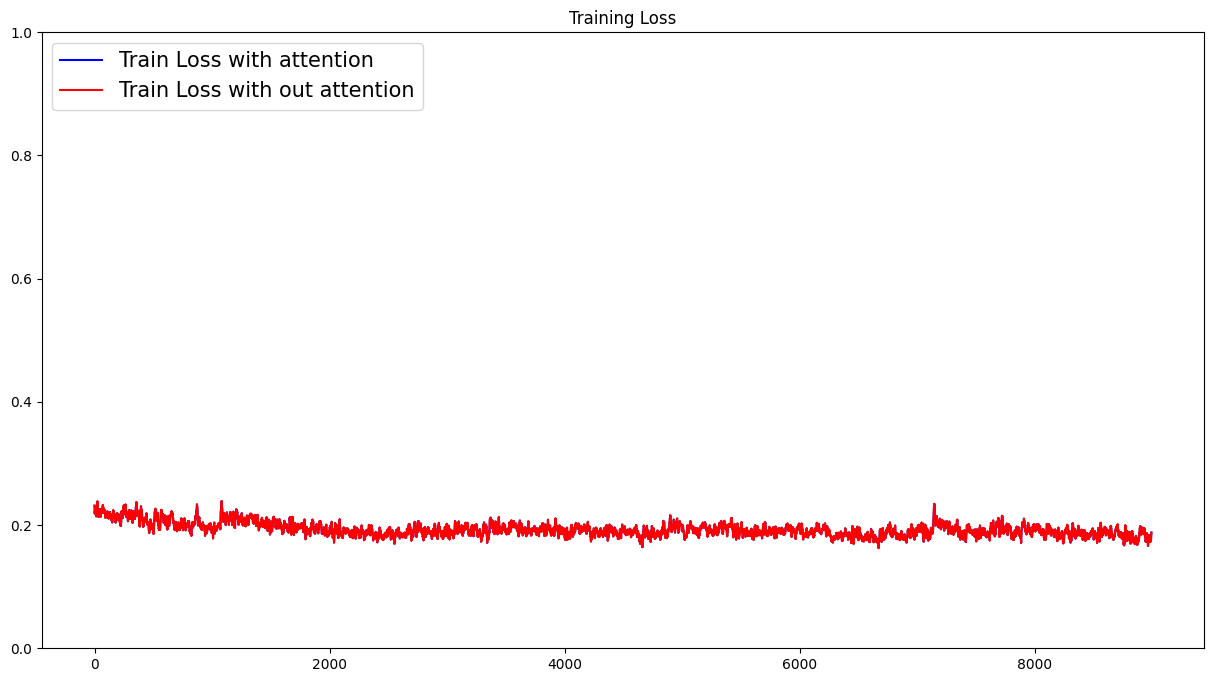

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x1 = np.linspace(0, 8991, 8991)

fig = plt.figure(figsize=(15,8))

y1 = np.convolve(atte_train_loss, np.ones((10,))/10, mode='valid')
y2 = np.convolve(train_loss, np.ones((10,))/10, mode='valid')

plt.plot(x1, y1, "-b", label="Train Loss with attention")
plt.plot(x1, y2, "-r", label="Train Loss with out attention")
plt.title("Training Loss")
plt.legend(loc="upper left" , prop={'size': 15})
plt.ylim(0, 1.0)
plt.show()

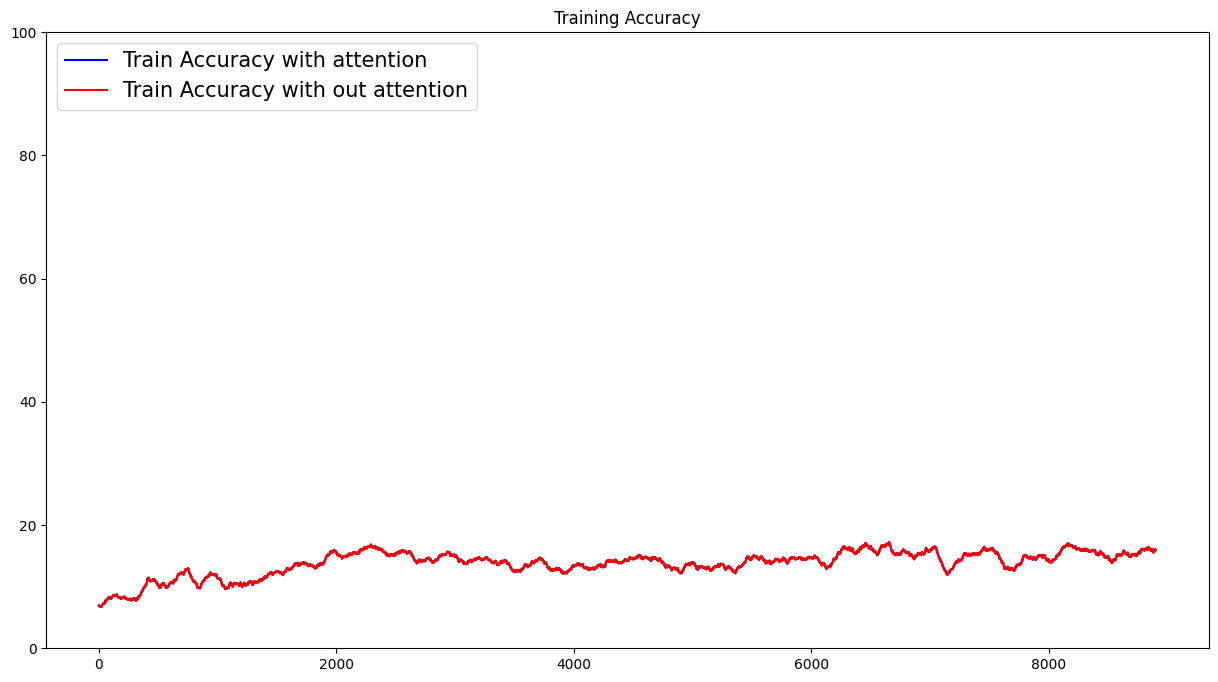

In [ ]:
x1 = np.linspace(0, 8901, 8901)

fig = plt.figure(figsize=(15,8))

y1 = np.convolve(atte_train_acc, np.ones((100,))/100, mode='valid')
y2 = np.convolve(train_acc, np.ones((100,))/100, mode='valid')

plt.plot(x1, y1, "-b", label="Train Accuracy with attention ")
plt.plot(x1, y2, "-r", label="Train Accuracy with out attention")
plt.title("Training Accuracy")
plt.legend(loc="upper left" , prop={'size': 15})
plt.ylim(0, 100.0)
plt.show()

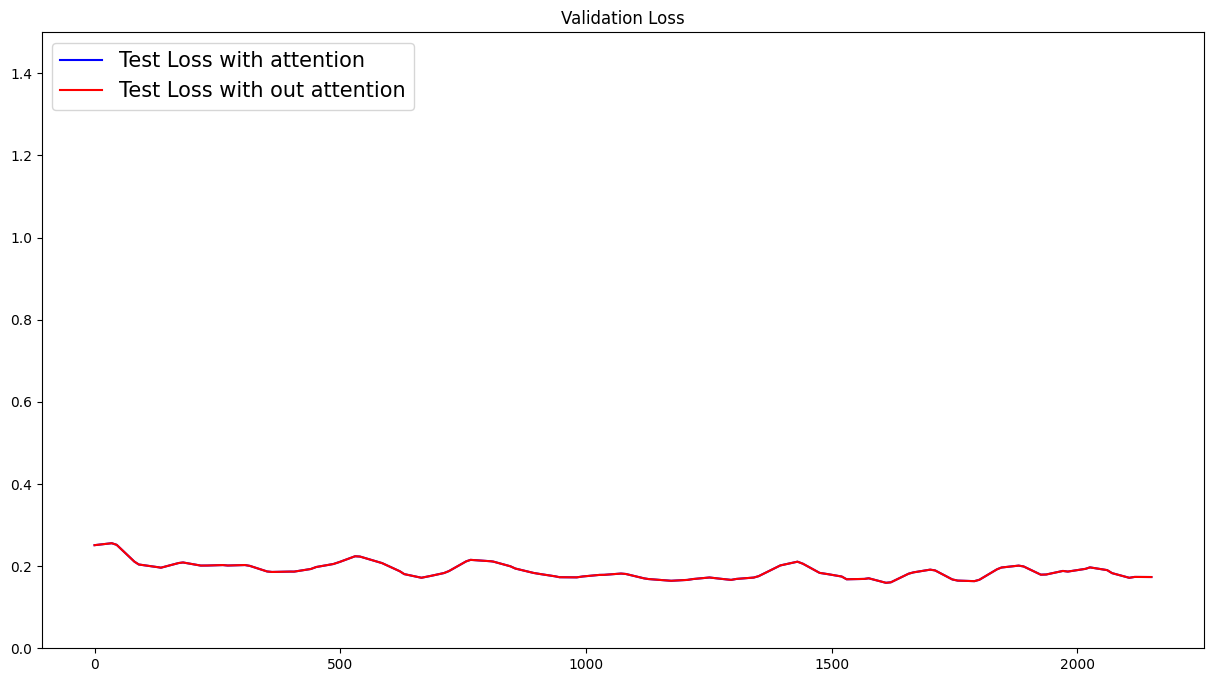

In [ ]:
x1 = np.linspace(0, 2151, 2151)

fig = plt.figure(figsize=(15,8))

y1 = np.convolve(atte_test_loss, np.ones((100,))/100, mode='valid')
y2 = np.convolve(test_loss, np.ones((100,))/100, mode='valid')

plt.plot(x1, y1, "-b", label="Test Loss with attention")
plt.plot(x1, y2, "-r", label="Test Loss with out attention")
plt.title("Validation Loss")
plt.legend(loc="upper left" , prop={'size': 15})
plt.ylim(0, 1.5)
plt.show()

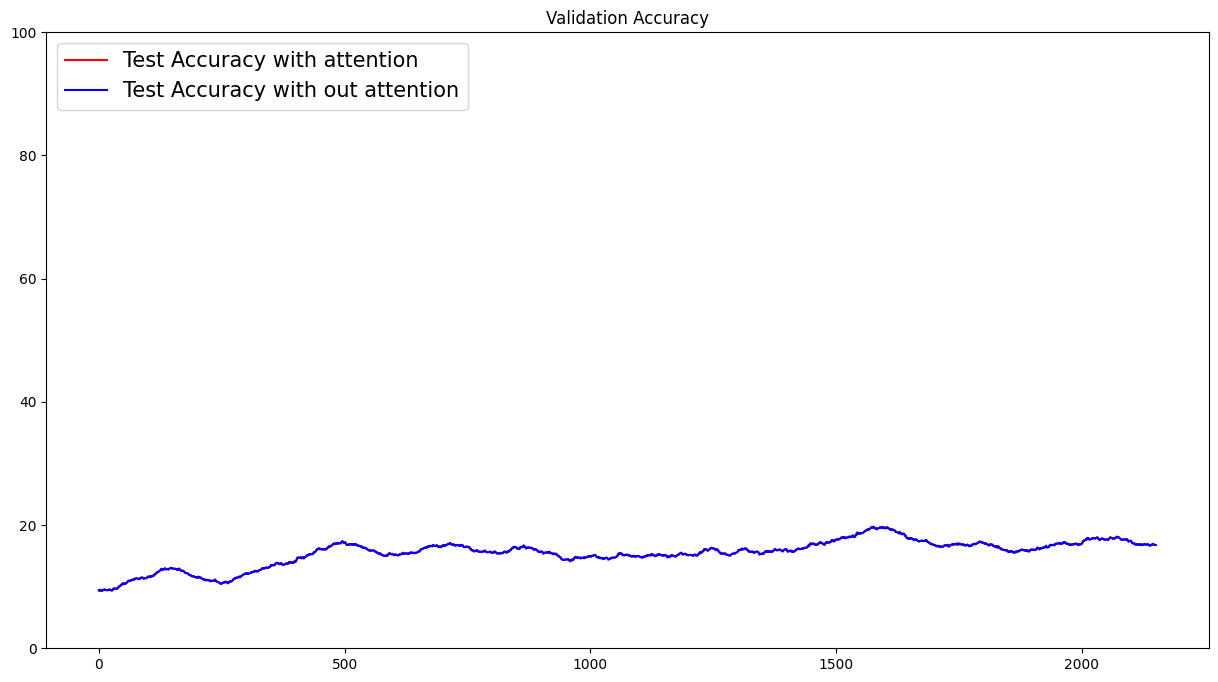

In [ ]:
x1 = np.linspace(0, 2151, 2151)

fig = plt.figure(figsize=(15,8))

y1 = np.convolve(atte_test_acc, np.ones((100,))/100, mode='valid')
y2 = np.convolve(test_acc, np.ones((100,))/100, mode='valid')

plt.plot(x1, y1, "-r", label="Test Accuracy with attention")
plt.plot(x1, y2, "-b", label="Test Accuracy with out attention")
plt.title("Validation Accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.ylim(0, 100.0)
plt.show()

# Inference the model

## Choose your parameters
* predict : number of prediction instances
* days_interest : number of days want to check
* user_id : interest user

In [ ]:
#number of predictions need
predict=2
#define the days want to check
days_interest =[1,2,3,4 , 10]
#user want to check
user_id = 0

## model forwardpass function

In [ ]:
def model_inference(inference_img , inference_seq):

    infernce_tensor = torch.tensor(inference_img ,dtype=torch.float32).unsqueeze(1)
    infernce_seq_tensor = torch.tensor(inference_seq , dtype=torch.float32)

    features = encoder_cnn(infernce_tensor)
    pred_loc , pred_cat , alphas = decoder_rnn(features , infernce_seq_tensor )
    _,loc_idx  =torch.topk(pred_loc, 1)
    _,cat_idx = torch.topk(pred_cat ,2)


    return loc_idx , cat_idx

In [ ]:
result_seq = []
result_img =[]
feature_i = data_set[user_id*120 : (user_id+1)*120]
img_feature_i = image_data[user_id*120 : (user_id+1)*120]

X, y, image_set = deque(maxlen=120) , deque(maxlen=120) , deque(maxlen=120)
X.extend(np.zeros(115) for i in range(120))
#y.extend(np.zeros(115) for i in range(15))
image_set.extend(np.zeros(94) for i in range(120))

for seq_no, ( seq , img_seq) in enumerate(zip(feature_i , img_feature_i)):
        # Add the sentence until the current count(i) and add the current count to the output
        X.append(seq)
        image_set.append(img_seq)

        result_seq.append(np.array(X))
        result_img.append(np.array(image_set))

## predict function

In [ ]:
import torch
from operator import itemgetter

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Ensure the model is on the correct device
#model.to(device)

# Your prediction logic here, now including device management
def run_prediction(predict, days_interest, result_img, result_seq, model_inference, location_transformer, category_transformer):
    if predict == 1:
        day_list = [i * 3 for i in days_interest]
        test_img_list = list(itemgetter(*day_list)(result_img))
        test_seq_list = list(itemgetter(*day_list)(result_seq))

        # Move data to the correct device
        test_img_list = [img.to(device) for img in test_img_list]
        test_seq_list = [seq.to(device) for seq in test_seq_list]

        loc_idx, cat_idx = model_inference(test_img_list, test_seq_list)
        for i in range(cat_idx.shape[0]):
            print(f"Day {days_interest[i]} Predictions")
            print(f"Predicted Locations : {list(location_transformer.inverse_transform(loc_idx[i]))} Predicted Categories : {list(category_transformer.inverse_transform(cat_idx[i]))}")
            print("\n")

    elif predict == 2:
        day_list = []
        for j in days_interest:
            day_list.append(j * 3)
            day_list.append(j * 3 + 1)
        test_img_list = list(itemgetter(*day_list)(result_img))
        test_seq_list = list(itemgetter(*day_list)(result_seq))

        # Move data to the correct device
        test_img_list = [img.to(device) for img in test_img_list]
        test_seq_list = [seq.to(device) for seq in test_seq_list]

        loc_idx, cat_idx = model_inference(test_img_list, test_seq_list)
        for i in range(int(len(cat_idx) / 2)):  # Adjusted loop condition for predict==2
            print(f"Day {days_interest[i // 2]} Predictions")
            print(f"Predicted Locations : {list(location_transformer.inverse_transform(loc_idx[i]))} Predicted Categories : {list(category_transformer.inverse_transform(cat_idx[i]))}")
            print("\n")

    elif predict == 3:
        day_list = []
        for j in days_interest:
            day_list.extend([j * 3, j * 3 + 1, j * 3 + 2])
        test_img_list = list(itemgetter(*day_list)(result_img))
        test_seq_list = list(itemgetter(*day_list)(result_seq))

        # Move data to the correct device
        test_img_list = [img.to(device) for img in test_img_list]
        test_seq_list = [seq.to(device) for seq in test_seq_list]

        loc_idx, cat_idx = model_inference(test_img_list, test_seq_list)
        for i in range(int(len(cat_idx) / 3)):  # Adjusted loop condition for predict==3
            print(f"Day {days_interest[i // 3]} Predictions")
            print(f"Predicted Locations : {list(location_transformer.inverse_transform(loc_idx[i]))} Predicted Categories : {list(category_transformer.inverse_transform(cat_idx[i]))}")
            print("\n")

#Example of how you might call this function
# predict = 1 # or 2, or 3 based on your scenario
# days_interest = [1, 2, 3] # example list of days you're interested in
# run_prediction(predict, days_interest, result_img, result_seq, model_inference, location_transformer, category_transformer)
